1. Manipulation de données: Ajouter les colonnes annee (entre 2005 et 2024), balcon, garage,note,price_category avec l'année, balcon et garave en booléan, note de 1 à 5 et category: low, normal high,scam (appréciation humaine si c'est une arnaque, bas prix, prix normal ou élevé).

In [1]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('appartements.csv')

# Générer les nouvelles colonnes

# Colonne 'annee' (entre 2005 et 2024)
df['annee'] = np.random.randint(2005, 2025, df.shape[0])

# Colonne 'balcon' (booléen aléatoire)
df['balcon'] = np.random.choice([True, False], df.shape[0])

# Colonne 'garage' (booléen aléatoire)
df['garage'] = np.random.choice([True, False], df.shape[0])

# Colonne 'note' (de 1 à 5)
df['note'] = np.random.randint(1, 6, df.shape[0])

# Colonne 'price_category' (low, normal, high, scam)
def assign_price_category():
    return random.choice(['low', 'normal', 'high', 'scam'])

df['price_category'] = df.apply(lambda row: assign_price_category(), axis=1)

# Affichage des premières lignes du dataframe avec les nouvelles colonnes
df.head()


,nbRooms,surface,nbWindows,price,id,annee,balcon,garage,note,price_category
0,4,10,3,100000,1,2011,True,True,2,scam
1,4,12,3,100000,2,2008,True,True,5,normal
2,4,15,3,100000,3,2019,True,False,1,low
3,4,15,2,100000,1725972975351,2012,False,False,2,scam
4,4,20,3,100000,1726214430072,2007,True,False,4,scam


2. Compléter votre dataset au plus vraissemblable. L'idée est d'en avoir entre 50 et 100.

In [3]:
import pandas as pd
import numpy as np
import random

# Fonction pour générer un dataset d'appartements factices
def generate_dataset(n_entries):

    data = {
        'id': range(1, n_entries + 1),
        'nbRooms': np.random.randint(1, 6, n_entries),
        'surface': np.random.randint(20, 150, n_entries),
        'nbWindows': np.random.randint(1, 10, n_entries),  
        'annee': np.random.randint(2005, 2025, n_entries),  
        'balcon': np.random.choice([True, False], n_entries),  
        'garage': np.random.choice([True, False], n_entries),  
        'note': np.random.randint(1, 6, n_entries), 
    }

    # Fonction pour assigner une catégorie de prix
    def assign_price_category():
        return random.choice(['bas prix', 'prix normal', 'élevé', 'arnaque'])

    # Ajout de la colonne 'price_category'
    data['price_category'] = [assign_price_category() for _ in range(n_entries)]

    # Création d'un DataFrame avec les données générées
    df = pd.DataFrame(data)

    return df

# Génération du dataset avec un nombre aléatoire entre 50 et 100
n_entries = random.randint(50, 100)
df = generate_dataset(n_entries)

# Affichage du dataset généré
df.head()

# Sauvegarder le dataset dans un fichier CSV
df.to_csv('appartements.csv', index=False)


3. Avec Numpy et Pandas:

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Charger le dataset à partir d'un fichier CSV
df = pd.read_csv('appartements.csv')


- Sur la surface: Moyenne, écart-type, surface minimale et maximale.

In [5]:
# Moyenne
surface_mean = df['surface'].mean()

# Écart-type
surface_std = df['surface'].std()

# Surface minimale et maximale
surface_min = df['surface'].min()
surface_max = df['surface'].max()

print(f"Moyenne de la surface: {surface_mean:.2f} m²")
print(f"Écart-type de la surface: {surface_std:.2f} m²")
print(f"Surface minimale: {surface_min} m², Surface maximale: {surface_max} m²")


Moyenne de la surface: 82.47 m²
Écart-type de la surface: 38.12 m²
Surface minimale: 21 m², Surface maximale: 149 m²


- Sur l'anne: Moyenne, construction la plus ancienne, la plus récente.

In [6]:
# Moyenne
annee_mean = df['annee'].mean()

# Construction la plus ancienne et la plus récente
annee_min = df['annee'].min()
annee_max = df['annee'].max()

print(f"Moyenne de l'année de construction: {annee_mean:.2f}")
print(f"Construction la plus ancienne: {annee_min}, la plus récente: {annee_max}")


Moyenne de l'année de construction: 2014.28
Construction la plus ancienne: 2005, la plus récente: 2024


- Sur le bacon: Proportion d'appartements avec un balcon.

In [7]:
# Proportion d'appartements avec balcon
balcon_proportion = df['balcon'].mean() * 100

print(f"Proportion d'appartements avec un balcon: {balcon_proportion:.2f}%")


Proportion d'appartements avec un balcon: 49.37%


- Comptage du nombre d'appartements dans chaque catégorie de prix (low, normal, high, scam).

In [8]:
# Comptage des catégories de prix
price_category_counts = df['price_category'].value_counts()

print("Répartition des catégories de prix :")
print(price_category_counts)


Répartition des catégories de prix :
price_category
arnaque        25
prix normal    21
élevé          21
bas prix       12
Name: count, dtype: int64


- Nombre de chambres (nbRooms): Moyenne, médiane, variance, écart-type.

In [9]:
# Moyenne
rooms_mean = df['nbRooms'].mean()

# Médiane
rooms_median = df['nbRooms'].median()

# Variance
rooms_variance = df['nbRooms'].var()

# Écart-type
rooms_std = df['nbRooms'].std()

print(f"Moyenne du nombre de chambres: {rooms_mean:.2f}")
print(f"Médiane du nombre de chambres: {rooms_median}")
print(f"Variance du nombre de chambres: {rooms_variance:.2f}")
print(f"Écart-type du nombre de chambres: {rooms_std:.2f}")


Moyenne du nombre de chambres: 3.01
Médiane du nombre de chambres: 3.0
Variance du nombre de chambres: 2.17
Écart-type du nombre de chambres: 1.47


Avec Matplop:
Créer un Diagramme à barres pour afficher la répartition des catégories de prix (par exemple, combien d'appartements sont "low", "normal", "high", "scam").

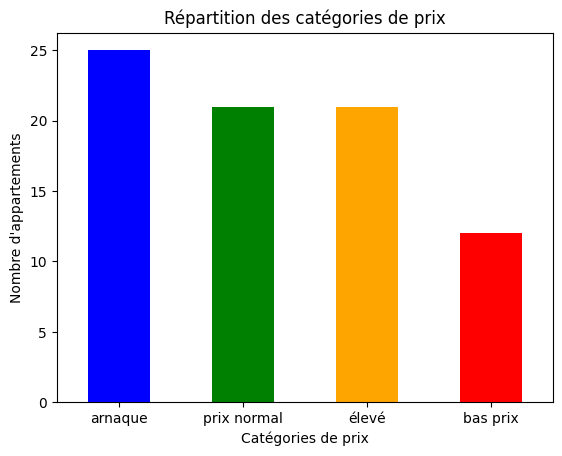

In [13]:
# Créer un diagramme à barres pour afficher la répartition des catégories de prix
price_category_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'])

plt.title("Répartition des catégories de prix")
plt.xlabel("Catégories de prix")
plt.ylabel("Nombre d'appartements")
plt.xticks(rotation=0)  # Rotation des étiquettes des catégories
plt.show()


Bonus: Créer un Heatmap pour voir la correlation entre Année de construction et prix afin de voir si les appartements plus récents ont tendance à être plus chers.

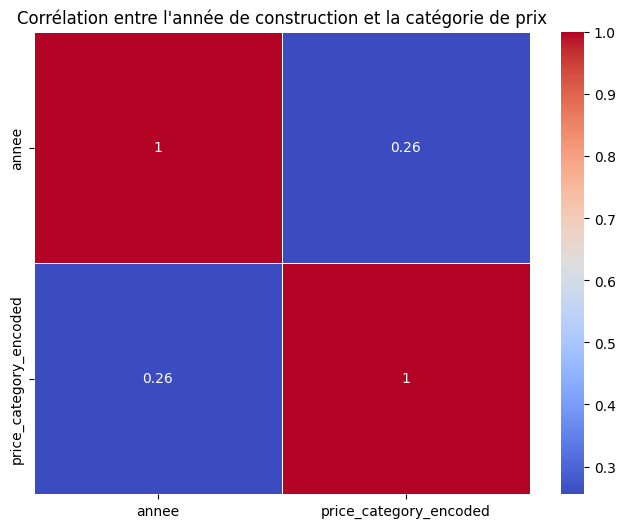

In [17]:
# Encodage des catégories de prix en valeurs numériques
price_mapping = {'bas prix': 1, 'prix normal': 2, 'élevé': 3, 'arnaque': 4}
df['price_category_encoded'] = df['price_category'].map(price_mapping)

# Créer une Heatmap pour voir la corrélation entre l'année de construction et le prix
plt.figure(figsize=(8, 6))
corr = df[['annee', 'price_category_encoded']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Corrélation entre l'année de construction et la catégorie de prix")
plt.show()


BONUS

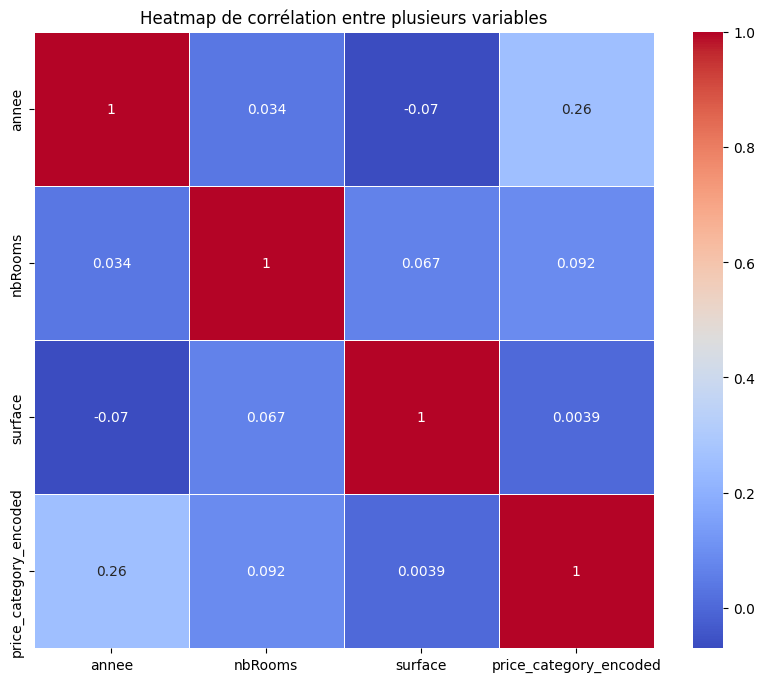

In [18]:
# Heatmap avec plus de variables
plt.figure(figsize=(10, 8))
corr = df[['annee', 'nbRooms', 'surface', 'price_category_encoded']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap de corrélation entre plusieurs variables")
plt.show()


-------------------------------------------------------------------------

1. Compléter avec une nouvelle colonne ville dans votre dataset si l'appartement est de Lyon, Paris ou Marseille 

In [20]:
import pandas as pd
import numpy as np

# Charger le dataset existant
df = pd.read_csv('appartements.csv')

# Fonction pour attribuer une ville aléatoire parmi Lyon, Paris, Marseille
def assign_ville():
    return np.random.choice(['Lyon', 'Paris', 'Marseille'])

# Ajouter la colonne 'ville' au DataFrame
df['ville'] = df.apply(lambda row: assign_ville(), axis=1)

# Sauvegarder le DataFrame mis à jour dans un fichier CSV
df.to_csv('appartements.csv', index=False)

# Afficher les premières lignes du DataFrame mis à jour
df.head()


,id,nbRooms,surface,nbWindows,annee,balcon,garage,note,price_category,ville
0,1,3,42,6,2012,False,True,4,prix normal,Paris
1,2,1,69,4,2020,True,True,2,prix normal,Paris
2,3,5,97,3,2009,True,False,4,arnaque,Paris
3,4,3,125,5,2019,True,True,3,élevé,Marseille
4,5,1,121,9,2021,True,True,2,arnaque,Paris


2. Créer une prédiction par regression linéaire sur la note en fonction de la ville, de la surface et du prix

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Charger le dataset mis à jour
df = pd.read_csv('appartements.csv')

# Prétraitement des données
# Encodage des variables catégorielles
label_encoder = LabelEncoder()
df['ville_encoded'] = label_encoder.fit_transform(df['ville'])

label_encoder_price = LabelEncoder()
df['price_category_encoded'] = label_encoder_price.fit_transform(df['price_category'])

# Préparer les variables indépendantes (features) et la variable dépendante (target)
X = df[['ville_encoded', 'surface', 'price_category_encoded']]
y = df['note']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")

# Afficher les coefficients du modèle
print("Coefficients du modèle :")
print(f"Ville (encodée) : {model.coef_[0]:.2f}")
print(f"Surface : {model.coef_[1]:.2f}")
print(f"Catégorie de prix (encodée) : {model.coef_[2]:.2f}")

# Afficher l'intercept du modèle
print(f"Intercept : {model.intercept_:.2f}")


Erreur quadratique moyenne (MSE) : 2.04
Coefficient de détermination (R²) : -0.17
Coefficients du modèle :
Ville (encodée) : 0.07
Surface : 0.01
Catégorie de prix (encodée) : 0.12
Intercept : 2.11


3. Créer une prédiction par regression linéaire sur l'année en fonction de la ville puis donnéer sa propabilité (R2) et son taux d'erreur en année (RSME ou MSE)

In [24]:
# Préparer les variables indépendantes (features) et la variable dépendante (target)
X = df[['ville_encoded']]
y = df['annee']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculer la racine carrée de MSE pour obtenir RMSE
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE) : {rmse:.2f}")
print(f"Coefficient de détermination (R²) : {r2:.2f}")

# Afficher les coefficients du modèle
print("Coefficient du modèle :")
print(f"Ville (encodée) : {model.coef_[0]:.2f}")

# Afficher l'intercept du modèle
print(f"Intercept : {model.intercept_:.2f}")


Erreur quadratique moyenne (MSE) : 34.09
Racine de l'erreur quadratique moyenne (RMSE) : 5.84
Coefficient de détermination (R²) : 0.01
Coefficient du modèle :
Ville (encodée) : -0.16
Intercept : 2014.39


4. Créer une classification logistique pour savoir si il y a un garage en fonction du prix et de la ville

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Charger les données
df = pd.read_csv('appartements.csv')

# Encodage des variables catégorielles (ville et price_category)
label_encoder_ville = LabelEncoder()
df['ville_encoded'] = label_encoder_ville.fit_transform(df['ville'])

label_encoder_price = LabelEncoder()
df['price_category_encoded'] = label_encoder_price.fit_transform(df['price_category'])

# Sélectionner les features (prix et ville) et la target (garage)
X = df[['price_category_encoded', 'ville_encoded']]
y = df['garage']  # Variable à prédire (garage)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = logistic_model.predict(X_test)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision (accuracy) : {accuracy:.2f}")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Précision (accuracy) : 0.50
[[3 3]
 [5 5]]
              precision    recall  f1-score   support

       False       0.38      0.50      0.43         6
        True       0.62      0.50      0.56        10

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.53      0.50      0.51        16



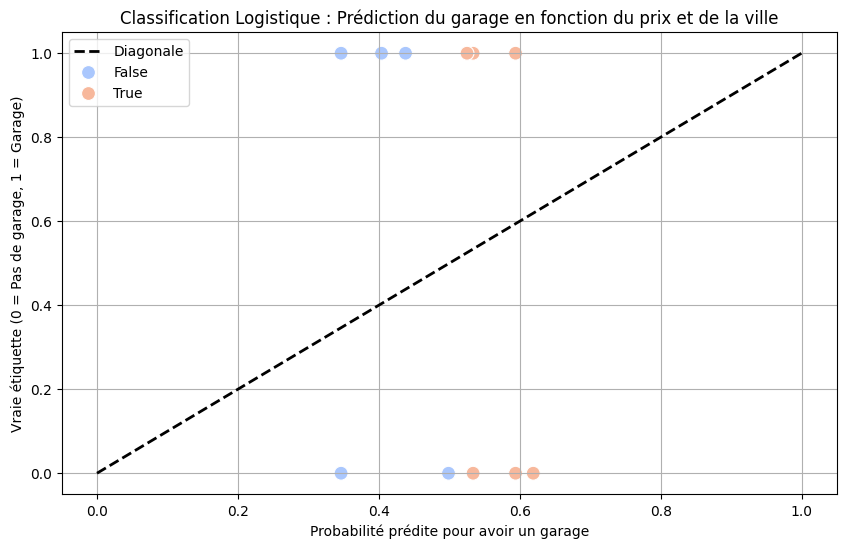

In [4]:
# Créer une figure pour la visualisation
plt.figure(figsize=(10, 6))

# Prédire les probabilités avec le modèle de régression logistique
probas = logistic_model.predict_proba(X_test)[:, 1]

# Tracer la diagonale de séparation
plt.plot([0, 1], [0, 1], 'k--', label='Diagonale', lw=2)

# Scatter plot des probabilités prédites (valeurs entre 0 et 1) et la vraie étiquette
sns.scatterplot(x=probas, y=y_test, hue=y_pred, palette='coolwarm', s=100)

# Configurations du graphique
plt.title('Classification Logistique : Prédiction du garage en fonction du prix et de la ville')
plt.xlabel('Probabilité prédite pour avoir un garage')
plt.ylabel('Vraie étiquette (0 = Pas de garage, 1 = Garage)')
plt.legend()
plt.grid(True)
plt.show()

5. Créer une classification par KNN pour savoir si il a un balcon en fonction du prix et de la ville

In [28]:
from sklearn.neighbors import KNeighborsClassifier
# Préparer les variables indépendantes (features) et la variable dépendante (target)
X = df[['price_category_encoded', 'ville_encoded']]
y = df['balcon']  # Variable à prédire (balcon)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle KNN
k = 5  # Nombre de voisins
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Précision (accuracy) : {accuracy:.2f}")
print("Matrice de confusion :")
print(conf_matrix)
print("Rapport de classification :")
print(class_report)

Précision (accuracy) : 0.56
Matrice de confusion :
[[7 3]
 [4 2]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.64      0.70      0.67        10
        True       0.40      0.33      0.36         6

    accuracy                           0.56        16
   macro avg       0.52      0.52      0.52        16
weighted avg       0.55      0.56      0.55        16



6. Pour les 2 classific ation précédente: afficher le accuracy, recall puis F1 Score

In [29]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

X = df[['price_category_encoded', 'ville_encoded']]
y = df['garage']  # Variable à prédire (garage)

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Précision (accuracy) : {accuracy:.2f}")
print(f"Rappel (recall) : {recall:.2f}")
print(f"Score F1 : {f1:.2f}")

# Afficher la matrice de confusion et le rapport de classification
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Précision (accuracy) : 0.50
Rappel (recall) : 0.50
Score F1 : 0.56
Matrice de confusion :
[[3 3]
 [5 5]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.38      0.50      0.43         6
        True       0.62      0.50      0.56        10

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.53      0.50      0.51        16



In [30]:
# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle KNN
k = 5  # Nombre de voisins
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

# Faire des prédictions
y_pred = model.predict(X_test)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Précision (accuracy) : {accuracy:.2f}")
print(f"Rappel (recall) : {recall:.2f}")
print(f"Score F1 : {f1:.2f}")

# Afficher la matrice de confusion et le rapport de classification
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))


Précision (accuracy) : 0.44
Rappel (recall) : 0.50
Score F1 : 0.53
Matrice de confusion :
[[2 4]
 [5 5]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.29      0.33      0.31         6
        True       0.56      0.50      0.53        10

    accuracy                           0.44        16
   macro avg       0.42      0.42      0.42        16
weighted avg       0.45      0.44      0.44        16



Bonus: Comparer les 2 méthodes de classification KNN et logistique précédente pour voir celle qui prédits le mieux: (accuracy, recall puis F1 Score)

In [31]:
# Préparer les variables indépendantes et dépendantes
X = df[['price_category_encoded', 'ville_encoded']]
y_garage = df['garage']  # Variable à prédire pour régression logistique
y_balcon = df['balcon']  # Variable à prédire pour KNN

# Diviser les données
X_train, X_test, y_train_garage, y_test_garage = train_test_split(X, y_garage, test_size=0.2, random_state=42)
X_train, X_test, y_train_balcon, y_test_balcon = train_test_split(X, y_balcon, test_size=0.2, random_state=42)

# 1. Régression Logistique
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train_garage)
y_pred_logistic = logistic_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test_garage, y_pred_logistic)
recall_logistic = recall_score(y_test_garage, y_pred_logistic)
f1_logistic = f1_score(y_test_garage, y_pred_logistic)

print("Régression Logistique :")
print(f"Précision (accuracy) : {accuracy_logistic:.2f}")
print(f"Rappel (recall) : {recall_logistic:.2f}")
print(f"Score F1 : {f1_logistic:.2f}")
print("Matrice de confusion :")
print(confusion_matrix(y_test_garage, y_pred_logistic))
print("Rapport de classification :")
print(classification_report(y_test_garage, y_pred_logistic))

# 2. KNN
k = 5  # Nombre de voisins
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train_balcon)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test_balcon, y_pred_knn)
recall_knn = recall_score(y_test_balcon, y_pred_knn)
f1_knn = f1_score(y_test_balcon, y_pred_knn)

print("KNN :")
print(f"Précision (accuracy) : {accuracy_knn:.2f}")
print(f"Rappel (recall) : {recall_knn:.2f}")
print(f"Score F1 : {f1_knn:.2f}")
print("Matrice de confusion :")
print(confusion_matrix(y_test_balcon, y_pred_knn))
print("Rapport de classification :")
print(classification_report(y_test_balcon, y_pred_knn))


Régression Logistique :
Précision (accuracy) : 0.50
Rappel (recall) : 0.50
Score F1 : 0.56
Matrice de confusion :
[[3 3]
 [5 5]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.38      0.50      0.43         6
        True       0.62      0.50      0.56        10

    accuracy                           0.50        16
   macro avg       0.50      0.50      0.49        16
weighted avg       0.53      0.50      0.51        16

KNN :
Précision (accuracy) : 0.56
Rappel (recall) : 0.33
Score F1 : 0.36
Matrice de confusion :
[[7 3]
 [4 2]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.64      0.70      0.67        10
        True       0.40      0.33      0.36         6

    accuracy                           0.56        16
   macro avg       0.52      0.52      0.52        16
weighted avg       0.55      0.56      0.55        16



Bonus ULTIMATE: Créer une classification avec Random Forest (new algo) pour savoir si il y a un balcon en fonction du prix et de la ville

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Préparer les variables indépendantes (features) et la variable dépendante (target)
X = df[['price_category_encoded', 'ville_encoded']]
y = df['balcon']  # Variable à prédire (balcon)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Faire des prédictions
y_pred = rf_model.predict(X_test)

# Évaluer le modèle
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Random Forest :")
print(f"Précision (accuracy) : {accuracy:.2f}")
print(f"Rappel (recall) : {recall:.2f}")
print(f"Score F1 : {f1:.2f}")

# Afficher la matrice de confusion et le rapport de classification
print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Random Forest :
Précision (accuracy) : 0.44
Rappel (recall) : 0.50
Score F1 : 0.40
Matrice de confusion :
[[4 6]
 [3 3]]
Rapport de classification :
              precision    recall  f1-score   support

       False       0.57      0.40      0.47        10
        True       0.33      0.50      0.40         6

    accuracy                           0.44        16
   macro avg       0.45      0.45      0.44        16
weighted avg       0.48      0.44      0.44        16

